In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rc("figure", figsize=(16,6))

In [2]:
df = pd.read_csv('brazilcloses.csv', parse_dates=["Date"], index_col=["Date"])
df.head()

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,3.603019,NaN,2.574450,NaN,NaN,NaN,7.771203,12.058657,4.660879,6.272922,...,5.800764,4.768429,2.192937,19.565647,22.915565,NaN,NaN,12.078684,2.019500,5.399953
2010-02-02,3.691014,NaN,2.593734,NaN,NaN,NaN,7.789201,12.299834,4.715263,6.372306,...,5.816371,4.778446,2.192937,19.635506,22.915565,NaN,NaN,12.049135,1.994980,5.306850
2010-02-03,3.745714,NaN,2.585258,NaN,NaN,NaN,7.765199,11.998370,4.731407,6.332911,...,5.826256,4.757412,2.192937,19.484135,22.865543,NaN,NaN,12.013021,2.023957,5.306850
2010-02-04,3.591129,NaN,2.542877,NaN,NaN,NaN,7.201109,11.777287,4.589715,6.145776,...,5.722726,4.674283,2.192937,18.727285,21.628588,NaN,NaN,11.999886,2.006125,4.864613
2010-02-05,3.460326,NaN,2.521685,NaN,NaN,NaN,6.847058,11.214552,4.465959,5.919256,...,5.514107,4.691310,2.192937,18.513811,21.446678,NaN,NaN,11.750370,1.916964,4.885561


In [3]:
df_rtn = df.pct_change().dropna(how='all')
df_rtn.head()

,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,0.024423,NaN,0.007491,NaN,NaN,NaN,0.002316,0.020000,0.011668,0.015843,...,0.002691,0.002101,0.0,0.003570,0.000000,NaN,NaN,-0.002446,-0.012141,-0.017241
2010-02-03,0.014820,NaN,-0.003268,NaN,NaN,NaN,-0.003081,-0.024510,0.003424,-0.006182,...,0.001700,-0.004402,0.0,-0.007709,-0.002183,NaN,NaN,-0.002997,0.014525,0.000000
2010-02-04,-0.041270,NaN,-0.016393,NaN,NaN,NaN,-0.072643,-0.018426,-0.029947,-0.029550,...,-0.017770,-0.017474,0.0,-0.038844,-0.054097,NaN,NaN,-0.001093,-0.008810,-0.083333
2010-02-05,-0.036424,NaN,-0.008334,NaN,NaN,NaN,-0.049166,-0.047781,-0.026964,-0.036858,...,-0.036454,0.003643,0.0,-0.011399,-0.008411,NaN,NaN,-0.020793,-0.044444,0.004306
2010-02-08,-0.010309,NaN,0.033530,NaN,NaN,NaN,0.021034,0.012545,-0.010040,-0.001665,...,0.010473,0.014731,0.0,-0.014675,0.007210,NaN,NaN,0.002235,0.032558,-0.030491


### Mean reversion and momentum via Fama-Macbeth - Sharpe ratio and profit per trade

In [4]:
# mean reversion signal based on r(t-5) + ... + r(t-1)
mr_sig_raw = -df_rtn.shift(1).rolling(5).sum().dropna(how='all')
# momentum signal based on r(t-252) + ... + r(t-22)
mom_sig_raw = df_rtn.shift(22).rolling(231).sum().dropna(how='all')

In [5]:
# This function normalizes panel cross-sections to have mean 0, variance 1.
def normalize(panel_data):
    return panel_data.sub(panel_data.mean(axis=1), axis=0).div(panel_data.std(axis=1),axis=0)

In [6]:
mr_sig_norm = normalize(mr_sig_raw)
mom_sig_norm = normalize(mom_sig_raw)

In [7]:
# This function takes a panel of positions and returns a time series of returns (in $).
def returns_from_positions(position_data, df_rtn):
    return (position_data * df_rtn).dropna(how='all').sum(axis=1)

In [8]:
# The Fama-Macbeth approach is equivalent to positions that are proportional to factors (signals).
# Also, we only want returns from beginning of 2014, so that we can compare momentum and
# mean reversion returns over the same time periods.
mr_rtn = returns_from_positions(mr_sig_norm, df_rtn)['2012-01-02':]
mom_rtn = returns_from_positions(mom_sig_norm, df_rtn)['2012-01-02':]

In [9]:
# This function takes a time series of daily returns & returns an annualized Sharpe ratio.
def sharpe_ratio(daily_return_series):
    return round(daily_return_series.mean() / daily_return_series.std() * 252**0.5, 2)

In [10]:
sharpe_ratio(mr_rtn), sharpe_ratio(mom_rtn)

(0.61, 0.62)

In [11]:
# Create a dataframe of factor returns and find its correlation matrix.
df_factors = pd.concat([mr_rtn, mom_rtn], axis=1, keys=["mr","mom"])
df_factors.corr()

,mr,mom
mr,1.000000,0.033891
mom,0.033891,1.000000


In [12]:
# Form a portfolio with 50% momentum strategy and 50% mean reversion strategy.
both_rtn = 0.5*mom_rtn + 0.5*mr_rtn
sharpe_ratio(both_rtn)

0.86

<AxesSubplot:xlabel='Date'>

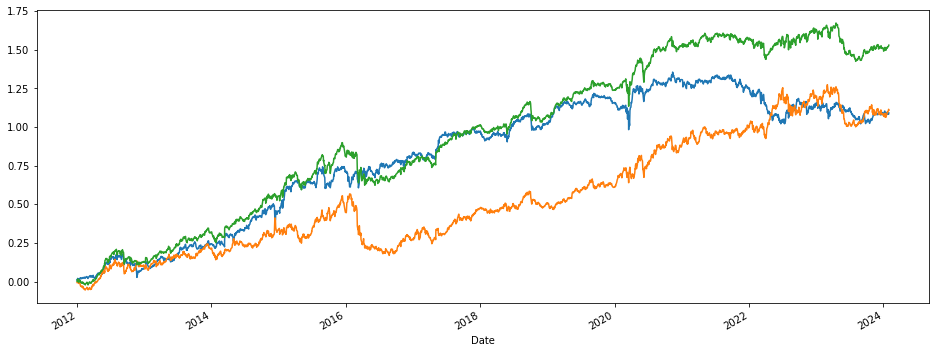

In [13]:
# Normalize the plot so every return has same annual volatility (15%).
plt.figure()
(mr_rtn.cumsum() / mr_rtn.std() * (0.15/252**0.5)).plot()
(mom_rtn.cumsum() / mom_rtn.std() * (0.15/252**0.5)).plot()
(both_rtn.cumsum() / both_rtn.std() * (0.15/252**0.5)).plot()

In [14]:
# This function takes a panel of positions and returns profit per trade (i.e. per $1 traded)
def profit_per_trade(position_data, df_rtn):
    total_profit = (position_data * df_rtn).dropna(how='all').sum(axis=1).sum()
    total_traded = abs(position_data - (position_data*(1+df_rtn)).shift()).sum(axis=1).sum()
    return round(total_profit / total_traded, 4)

In [15]:
# Momentum profit per trade
profit_per_trade(mom_sig_norm["2014-01-02":], df_rtn["2014-01-02":])

0.0031

In [16]:
# Mean reversion profit per trade
profit_per_trade(mr_sig_norm["2014-01-02":], df_rtn["2014-01-02":])

0.0004

### Winsorized positions
"Winsorization" means limiting the extreme values of a distribution.  We can use this to make our trading strategy more robust.  The financial interpretation is that we are imposing a position limit.

In [17]:
# This "winsorizes" the normalized signals, i.e. capping their absolute values.
cap = 0.5
mom_winsor_position = np.minimum(np.maximum(mom_sig_norm, -cap), cap)
mr_winsor_position = np.minimum(np.maximum(mr_sig_norm, -cap), cap)

In [18]:
mom_rtn = returns_from_positions(mom_winsor_position, df_rtn)['2012-01-02':]
mr_rtn  = returns_from_positions(mr_winsor_position,  df_rtn)['2012-01-02':]
both_rtn = 0.5*mom_rtn + 0.5*mr_rtn

In [19]:
sharpe_ratio(mom_rtn), sharpe_ratio(mr_rtn), sharpe_ratio(both_rtn)

(0.57, 0.78, 0.95)

In [20]:
# Momentum profit per trade for winsorized positions
profit_per_trade(mom_winsor_position['2014-01-02':], df_rtn['2012-01-02':])

0.0019

In [21]:
# Mean reversion profit per trade for winsorized positions
profit_per_trade(mr_winsor_position['2014-01-02':], df_rtn['2012-01-02':])

0.0004

### Mean reversion and momentum via ranked portfolios
Here we take positions of +1, -1 or 0 based on the cross-sectional ranks of the signals.  This is an alternative to winsorization which also tends to make our strategy more robust

In [22]:
# This function ranks panel cross-sections, and returns +1 if in the highest
# alpha-quantile, -1 if in the lowest alpha-quantile, and 0 otherwise.
def rank_bin(panel_data, alpha):
    if alpha <=0 or alpha>=0.5:
        raise ValueError("Alpha should be greater than 0- and less than 0.5")
    return panel_data.apply(pd.qcut, axis=1, args=([0, alpha, 1-alpha, 1.],), labels=[-1,0,1]).astype("float64")

In [23]:
# Go long $1 for the top 40%, short $1 for the bottom 40%, and flat for the middle 20%.
mom_ranked_position = rank_bin(mom_sig_raw, 0.4)
mr_ranked_position = rank_bin(mr_sig_raw, 0.4)

In [24]:
# I only want returns from beginning of 2014.
mom_rtn = returns_from_positions(mom_ranked_position, df_rtn)['2012-01-02':]
mr_rtn  = returns_from_positions(mr_ranked_position,  df_rtn)['2012-01-02':]
both_rtn = 0.5*mom_rtn + 0.5*mr_rtn

In [25]:
sharpe_ratio(mom_rtn), sharpe_ratio(mr_rtn), sharpe_ratio(both_rtn)

(0.54, 0.78, 0.91)

In [26]:
# Momentum profit per trade for ranked positions
profit_per_trade(mom_ranked_position['2012-01-02':], df_rtn['2012-01-02':])

0.0019

In [27]:
# Mean reversion profit per trade for winsorized positions
profit_per_trade(mr_ranked_position['2012-01-02':], df_rtn['2012-01-02':])

0.0005

<AxesSubplot:xlabel='Date'>

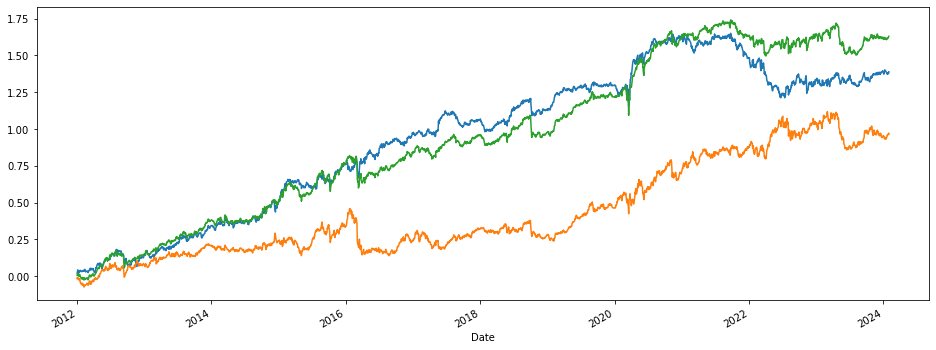

In [28]:
# Normalize the plot so every return has same annual volatility (15%).
plt.figure()
(mr_rtn.cumsum() / mr_rtn.std() * (0.15/252**0.5)).plot()
(mom_rtn.cumsum() / mom_rtn.std() * (0.15/252**0.5)).plot()
(both_rtn.cumsum() / both_rtn.std() * (0.15/252**0.5)).plot()